# Affordable Housing and Cost of Living Trends By County in Maryland

## Importing Libraries

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


## Table 1

In [300]:
table1 = pd.read_csv("QualityOfLife.csv") # reading csv into variable
print(table1.dtypes)                      # what are the types of each of the columns?
table1.head()                             # lets get a visual of the table 

County                                      object
Cost of Living Index                        object
Average Sale Price of a Home ($ Dollars)    object
Median Sale Price of a Home ($ Dollars)     object
Number of Housing Units Sold                object
dtype: object


,County,Cost of Living Index,Average Sale Price of a Home ($ Dollars),Median Sale Price of a Home ($ Dollars),Number of Housing Units Sold
0,Allegany County,84.9,105707,90829,624
1,Anne Arundel County,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert County,121.7,348891,318471,1576


In [301]:
# the names of the columns are long and redundant, so lets change them 
table1 = table1.rename(columns = {'Average Sale Price of a Home ($ Dollars)': 'Average Sale Price',
                                    'Median Sale Price of a Home ($ Dollars)' : 'Median Sale Price',
                                    'Number of Housing Units Sold' : 'Number of Units Sold'})
                                   
# "housing" doesnt need to be in the column headers in my opinion because the subject of the 
# columns is inferred by the table name and research topic

# now we're going to drop rows 24-27 because they dont store numerical data (this woulc cause
# problems later on when changubg types and performing analysis)
table1 = table1.drop(index = [24,25, 26, 27])
table1.head()

,County,Cost of Living Index,Average Sale Price,Median Sale Price,Number of Units Sold
0,Allegany County,84.9,105707,90829,624
1,Anne Arundel County,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert County,121.7,348891,318471,1576


In [302]:
# to perform analytics and make visualizations of the data, numbers need to be ints or floats
table1 = table1.astype({'Cost of Living Index': float, 
                        'Average Sale Price': int, 
                        'Median Sale Price': int, 
                        'Number of Units Sold' : int})

# lets double check the changes
print(table1.dtypes)

County                   object
Cost of Living Index    float64
Average Sale Price        int64
Median Sale Price         int64
Number of Units Sold      int64
dtype: object


In [303]:
# to synchronize naming with the next table, we're going to remove 'County' from the county names
func = lambda elem : elem.replace('County', '').rstrip() if elem.split(' ')[0] != 'Baltimore' else elem
table1['County'] = table1['County'].apply(func)
table1.head()

,County,Cost of Living Index,Average Sale Price,Median Sale Price,Number of Units Sold
0,Allegany,84.9,105707,90829,624
1,Anne Arundel,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert,121.7,348891,318471,1576


In [304]:
table1.at[ 18, 'County'] = "Saint Mary's"
table1

,County,Cost of Living Index,Average Sale Price,Median Sale Price,Number of Units Sold
0,Allegany,84.9,105707,90829,624
1,Anne Arundel,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert,121.7,348891,318471,1576
5,Caroline,98.8,194819,181574,351
6,Carroll,113.8,335577,316458,2312
7,Cecil,105.6,232193,225308,1229
8,Charles,123.5,306088,295354,2530
9,Dorchester,94.3,200535,169719,413


## Table 2

In [305]:
table2 = pd.read_csv("AffordableHousing.csv") # reading csv into variable
table2.head()

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,48.1,All races/ ethnicities (aggregated),2016,Affordable Housing
1,Allegany,98.2,All races/ ethnicities (aggregated),2016,Affordable Housing
2,Anne Arundel,28.5,All races/ ethnicities (aggregated),2016,Affordable Housing
3,Baltimore City,76.4,All races/ ethnicities (aggregated),2016,Affordable Housing
4,Baltimore County,64.1,All races/ ethnicities (aggregated),2016,Affordable Housing


In [306]:
# lets remove the 2 columns that dont provide helpful/useful information
table2 = table2.drop(columns = {"Race/ ethnicity", "Measure"}) 
table2.head()

,Jurisdiction,Value,Year
0,State,48.1,2016
1,Allegany,98.2,2016
2,Anne Arundel,28.5,2016
3,Baltimore City,76.4,2016
4,Baltimore County,64.1,2016


In [307]:
print(table2.dtypes) # are the types correct?

Jurisdiction     object
Value           float64
Year              int64
dtype: object


In [308]:
# now we're going to create a new df that groups/organizes the data by county. 
# this will be helpful for visualization later on
countiesDF = table2.groupby(['Jurisdiction']) 

# now, we're going to prefrom linear regression on each county, the predictions will be stored
# in the dictionary below s.t. key -> county ; value -> [predications]
pred = {}
for key, group in countiesDF:
        # pythons linear regression library requires changing an array's shape to (-1,1)
        x         = group['Year'].to_numpy().reshape(-1,1)
        y         = group['Value'].to_numpy().reshape(-1,1)
        reg       = LinearRegression().fit(x , y)
        y_pred    = reg.predict(x) 
        pred[key] = y_pred
        
        # alternatively, could use numpy's polyfit and calc mx+b at ploting time
        #m,b         = np.polyfit(x, y, 1)
        #pred[key] = [m,b]

print(pred['Allegany']) # lets check that our dictionary is correct


[[97.19181818]
 [97.01818182]
 [96.84454545]
 [96.67090909]
 [96.49727273]
 [96.32363636]
 [96.15      ]
 [97.36545455]
 [97.53909091]
 [97.71272727]
 [97.88636364]]


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/237612901.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in countiesDF:


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/3031394758.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in countiesDF :


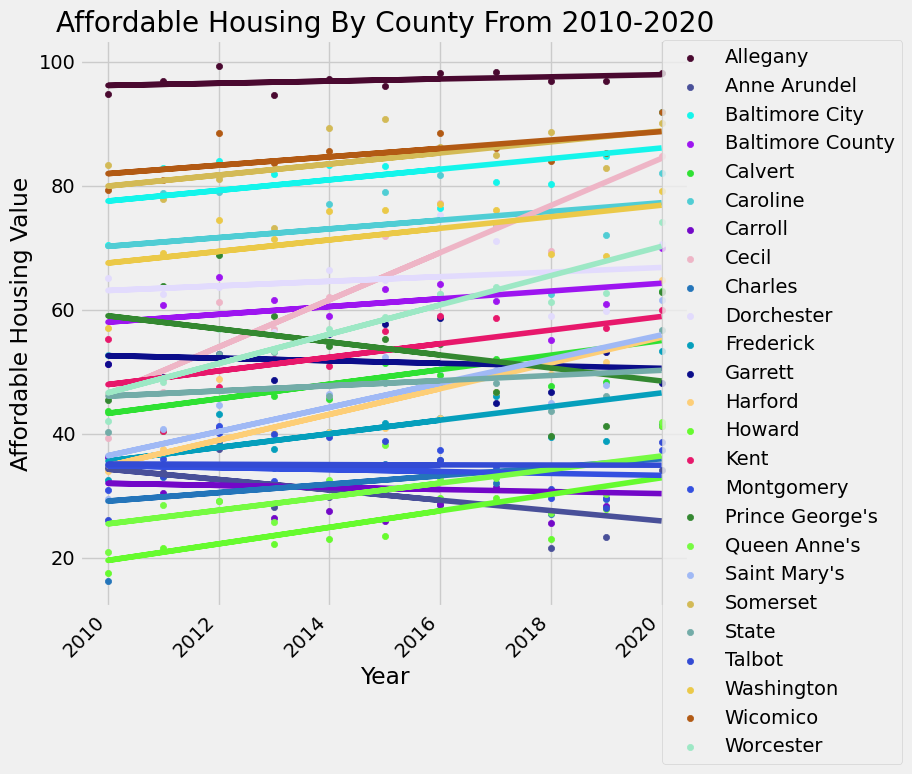

In [309]:
# lets color code each county (colors assigned randomly)
colors = {}
for county in table2['Jurisdiction'].values:
       colors[county] = (np.random.random(),np.random.random(),np.random.random()) # R, G, B
       
fig, ax = plt.subplots(figsize=(7, 7))
# now, we want to iterate through the df by county
for key, group in countiesDF :
       # key = group name (aka county name); group = subset of df where jurisdiction == key 
       # first, plotting values for the current county 
       group.plot(ax = ax, kind='scatter', y='Value', x='Year', label=key,
                     color= colors[key])
       # second, adding the regression line previously for the current county
       x = group['Year'].to_numpy().reshape(-1,1) # necessary shape for plotting
       plt.plot( x, pred[key], color= colors[key])

plt.legend(bbox_to_anchor = (1.35, 1) ,loc = "upper right", borderaxespad = 0)
plt.xticks(rotation = 45, ha = 'right') #so that the x-axis labels dont merge
plt.xlabel('Year')
plt.ylabel('Affordable Housing Value')
plt.title("Affordable Housing By County From 2010-2020") ## didnt work?
plt.show()

Initial thoughts based off graph:

1. There appears to be a direct, linear relationship between year and the affordable housing value. For some counties and some years the rate of change betwen years is drastic while for others its more subtle, but all in all, year does affect the affordable housing value in I would guess a statistically significant way.

2. There's a large variance in the affordable housing value across all counties. 


In [310]:
table2 = table2.drop(table2[table2['Jurisdiction'] == 'State'].index) # this needs to be done to merge the dfs

# lets combine some of the columns from table1 to table2
table1 = table1.rename(columns = {'County': 'Jurisdiction'})
table2 = table2.merge(table1[['Jurisdiction','Cost of Living Index']], on = 'Jurisdiction', how = 'left')
table2

,Jurisdiction,Value,Year,Cost of Living Index
0,Allegany,98.2,2016,84.9
1,Anne Arundel,28.5,2016,119.6
2,Baltimore City,76.4,2016,101.3
3,Baltimore County,64.1,2016,109.9
4,Calvert,49.5,2016,121.7
...,...,...,...,...
260,Somerset,90.1,2020,86.2
261,Talbot,38.7,2020,100.9
262,Washington,79.2,2020,97.7
263,Wicomico,91.8,2020,98.6


## Analysis 

In [311]:
res = smf.ols(formula = "Q(\"Value\") ~ Year", data = table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.041
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0454
Time:                        14:40:55   Log-Likelihood:                -1179.1
No. Observations:                 265   AIC:                             2362.
Df Residuals:                     263   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1583.9518    815.021     -1.943      0.0

It looks like 'Year' is borderline statistically significant in causing the change in values across counties each year given that the p-value is barely less than/equal to 0.05. Additionially, the F-statistic is objectively low, especially in comparison to the regressions we're doing next.


This coincides with the results from the graph above where for some counties, the value varied significantly between years, whereas for others, not so much. 

From this regression alone, Im willing to conceide that year does affect the affordable housing value, but not too greatly.

In [312]:
res = smf.ols(formula= "Q(\"Value\") ~ Jurisdiction ", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     102.3
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.65e-110
Time:                        14:40:55   Log-Likelihood:                -866.34
No. Observations:                 265   AIC:                             1781.
Df Residuals:                     241   BIC:                             1867.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

The p-value is 0 for all the jurisdictions indicating that the affect of jurisdiction on affordable housing is no due to chance but rather statistically significant. Additionally, the F-statistic here is larger than the previous regression indicating that jurisdiction alone could have a greater affect on affordable housing than year.

I do believe, however, that better regression results can be attained.

In [313]:
res = smf.ols(formula= "Q(\"Value\") ~ Year : Jurisdiction ", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     118.5
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.11e-118
Time:                        14:40:55   Log-Likelihood:                -842.79
No. Observations:                 265   AIC:                             1736.
Df Residuals:                     240   BIC:                             1825.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

The results from this regression are pretty similar to the last two regressions performed, except the F-statistic is larger leading me to believe that we're getting closer to get a more complete analysis of the data.

### Changing our POV

We've looked at the affect of jurisdiction and county on the affordable housing value, now I'd like to see what the relationship between the cost of living and affordable housing is. 

Intuitively, it would seem that the higher the cost of living the lower the affordable housing value. Let's see if the data supports this inference.

/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/1879471274.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped :


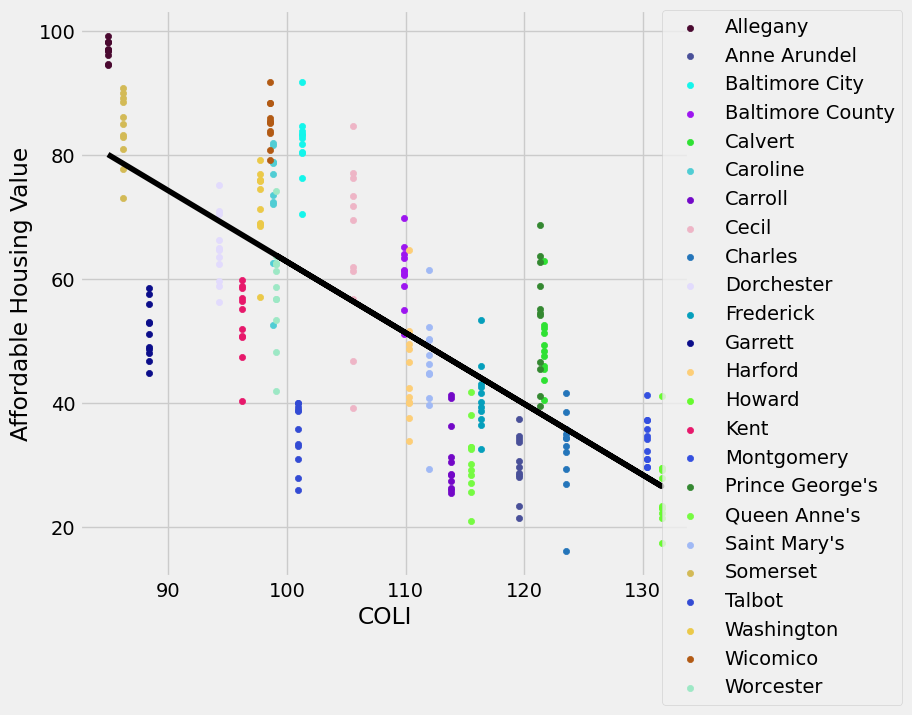

In [314]:
grouped = table2.groupby(['Jurisdiction'])
fig, ax = plt.subplots(figsize=(7, 7))
# now, we want to iterate through the df by county
for key, group in grouped :
       # key = group name (aka county name); group = subset of df where jurisdiction == key 
       # first, plotting values for the current county 
       group.plot(ax = ax, kind='scatter', x='Cost of Living Index', y='Value', label=key,
                     color= colors[key])

y      = table2['Value'].to_numpy().reshape(-1,1)
x      = table2['Cost of Living Index'].to_numpy().reshape(-1,1)
reg    = LinearRegression().fit(x , y)
y_pred = reg.predict(x) 

plt.plot(x, y_pred, color = "Black")
plt.legend(bbox_to_anchor = (1.35, 1) ,loc = "upper right", borderaxespad = 0)
plt.xlabel('COLI')
plt.ylabel('Affordable Housing Value')
plt.show()

It's highly indicative from this regression line that the cost of living index is inversely correlated to the affordable housing value. 

/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/4038431469.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped :


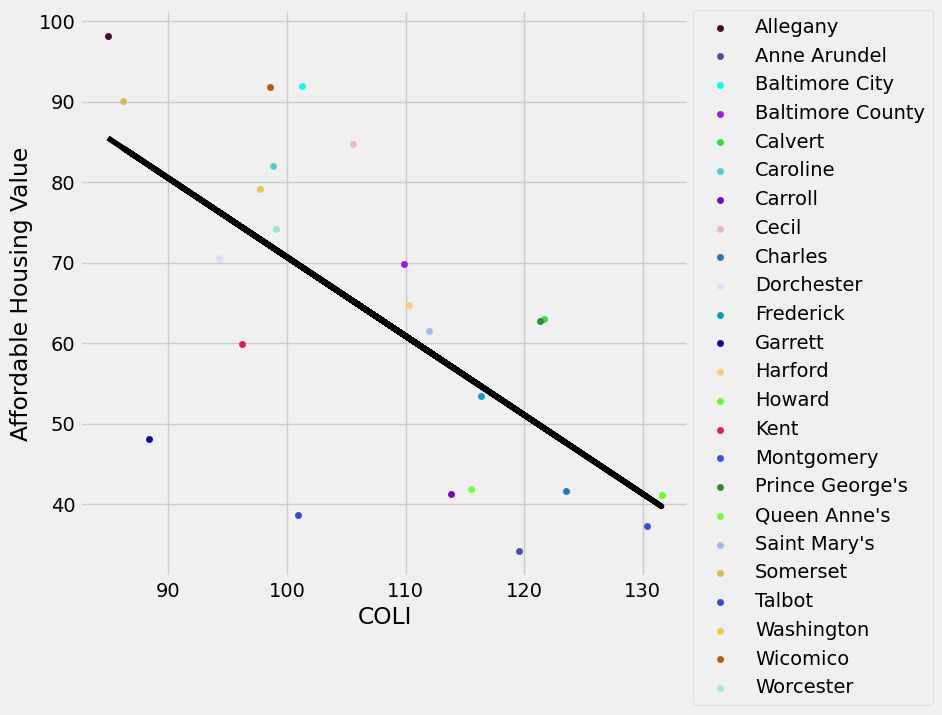

In [315]:
subset = table2[table2['Year'] == 2020]
grouped = subset.groupby(['Jurisdiction'])
fig, ax = plt.subplots(figsize=(7, 7))
# now, we want to iterate through the df by county
for key, group in grouped :
       # key = group name (aka county name); group = subset of df where jurisdiction == key 
       # first, plotting values for the current county 
       group.plot(ax = ax, kind='scatter', x='Cost of Living Index', y='Value', label=key,
                     color= colors[key])

y      = subset['Value'].to_numpy().reshape(-1,1)
x      = subset['Cost of Living Index'].to_numpy().reshape(-1,1)
reg    = LinearRegression().fit(x , y)
y_pred = reg.predict(x) 

plt.plot(x, y_pred, color = "Black")
plt.legend(bbox_to_anchor = (1.4, 1) ,loc = "upper right", borderaxespad = 0)
plt.xlabel('COLI')
plt.ylabel('Affordable Housing Value')
plt.show()

In [316]:
res = smf.ols(formula= " Q(\"Value\") ~ Q(\"Cost of Living Index\")", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     285.1
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           7.80e-44
Time:                        14:40:59   Log-Likelihood:                -1083.8
No. Observations:                 265   AIC:                             2172.
Df Residuals:                     263   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

This is the highest F-statistic we've seen by far, indicating of all the correlation's we've tried to discern thus far, the correlating between affordable housing and cost of living is the greatest.

In [360]:
# ratio Cost of Living to Affordable Value
table2["% COLI to AV"] = table2["Cost of Living Index"] - table2["Value"] 
table2

,Jurisdiction,Value,Year,Cost of Living Index,% COLI to AV
0,Allegany,98.2,2016,84.9,-13.3
1,Anne Arundel,28.5,2016,119.6,91.1
2,Baltimore City,76.4,2016,101.3,24.9
3,Baltimore County,64.1,2016,109.9,45.8
4,Calvert,49.5,2016,121.7,72.2
...,...,...,...,...,...
260,Somerset,90.1,2020,86.2,-3.9
261,Talbot,38.7,2020,100.9,62.2
262,Washington,79.2,2020,97.7,18.5
263,Wicomico,91.8,2020,98.6,6.8


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/3195289856.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped :


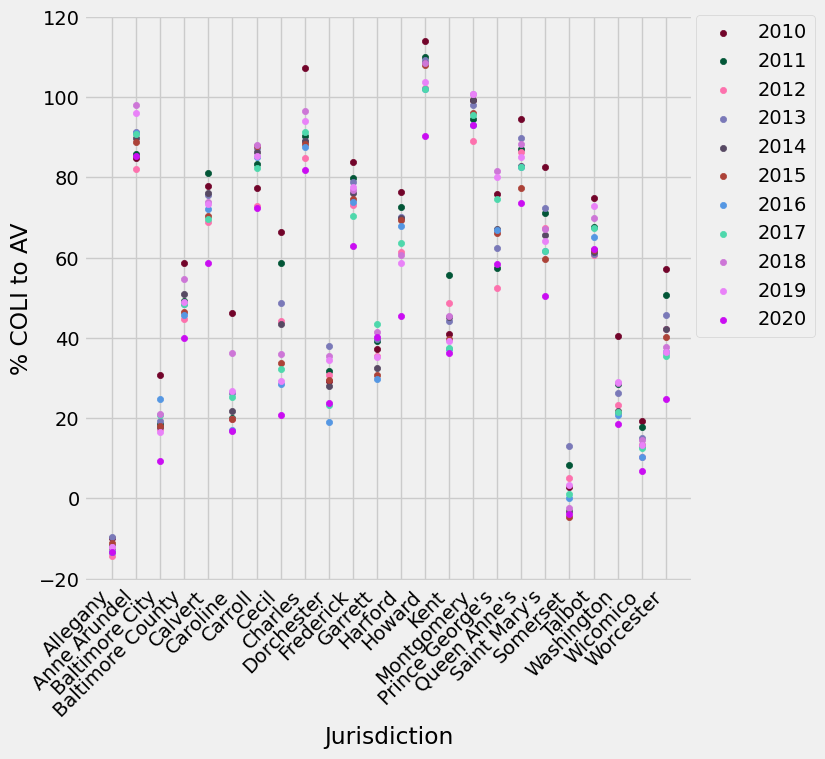

In [361]:
grouped = table2.groupby(['Year'])
fig, ax = plt.subplots(figsize=(7, 7))
# now, we want to iterate through the df by county
for key, group in grouped :
       # key = group name (aka county name); group = subset of df where jurisdiction == key 
       # first, plotting values for the current county 
       group.plot(ax = ax, kind='scatter', x='Jurisdiction', y='% COLI to AV', label=key,
                     color= (np.random.random(),np.random.random(),np.random.random()))
       
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.2, 1) ,loc = "upper right", borderaxespad = 0)
plt.show()


## Machine Learning

Where do you get more bang for you buck in 20202?

In [362]:
table3 = table2[table2['Year'] == 2020]
table3

,Jurisdiction,Value,Year,Cost of Living Index,% COLI to AV
241,Allegany,98.2,2020,84.9,-13.3
242,Anne Arundel,34.2,2020,119.6,85.4
243,Baltimore City,91.9,2020,101.3,9.4
244,Baltimore County,69.9,2020,109.9,40.0
245,Calvert,63.0,2020,121.7,58.7
246,Caroline,82.0,2020,98.8,16.8
247,Carroll,41.3,2020,113.8,72.5
248,Cecil,84.7,2020,105.6,20.9
249,Charles,41.7,2020,123.5,81.8
250,Dorchester,70.6,2020,94.3,23.7


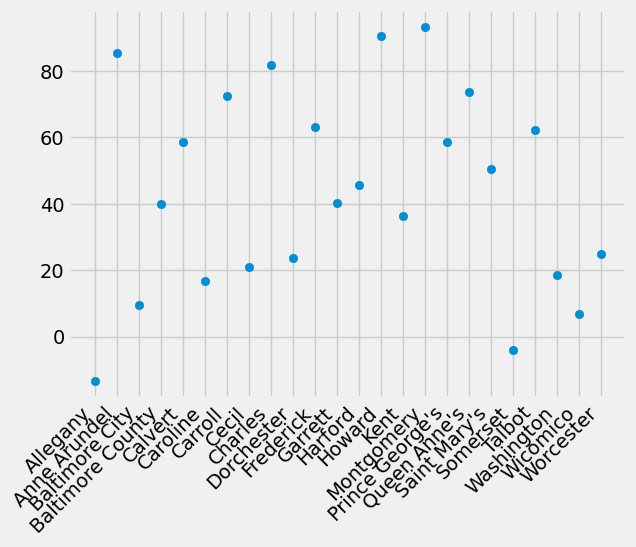

In [363]:
plt.scatter(table3['Jurisdiction'], table3['% COLI to AV'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [364]:
features = np.array((np.arange(24),table3['% COLI to AV'])).T
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

features

array([[  0. , -13.3],
       [  1. ,  85.4],
       [  2. ,   9.4],
       [  3. ,  40. ],
       [  4. ,  58.7],
       [  5. ,  16.8],
       [  6. ,  72.5],
       [  7. ,  20.9],
       [  8. ,  81.8],
       [  9. ,  23.7],
       [ 10. ,  63. ],
       [ 11. ,  40.3],
       [ 12. ,  45.5],
       [ 13. ,  90.4],
       [ 14. ,  36.3],
       [ 15. ,  93.1],
       [ 16. ,  58.5],
       [ 17. ,  73.6],
       [ 18. ,  50.5],
       [ 19. ,  -3.9],
       [ 20. ,  62.2],
       [ 21. ,  18.5],
       [ 22. ,   6.8],
       [ 23. ,  24.9]])

In [365]:
scaled_features

array([[-1.66132477, -1.91359803],
       [-1.51686175,  1.38355866],
       [-1.37239873, -1.1552854 ],
       [-1.2279357 , -0.13306661],
       [-1.08347268,  0.49162265],
       [-0.93900965, -0.90808216],
       [-0.79454663,  0.95262329],
       [-0.65008361, -0.77111821],
       [-0.50562058,  1.26329763],
       [-0.36115756, -0.67758185],
       [-0.21669454,  0.63526778],
       [-0.07223151, -0.12304485],
       [ 0.07223151,  0.05066553],
       [ 0.21669454,  1.55058787],
       [ 0.36115756, -0.25666823],
       [ 0.50562058,  1.64078365],
       [ 0.65008361,  0.48494149],
       [ 0.79454663,  0.98936971],
       [ 0.93900965,  0.21769474],
       [ 1.08347268, -1.59958311],
       [ 1.2279357 ,  0.6085431 ],
       [ 1.37239873, -0.85129223],
       [ 1.51686175, -1.24214059],
       [ 1.66132477, -0.63749484]])

How many cluster centers should there be?

In [366]:
kmeans_kwargs = {
    "init" : "random",
    "n_init" :10, 
    "max_iter" : 100,
    }
sil_coef = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    sil_coef.append(score)

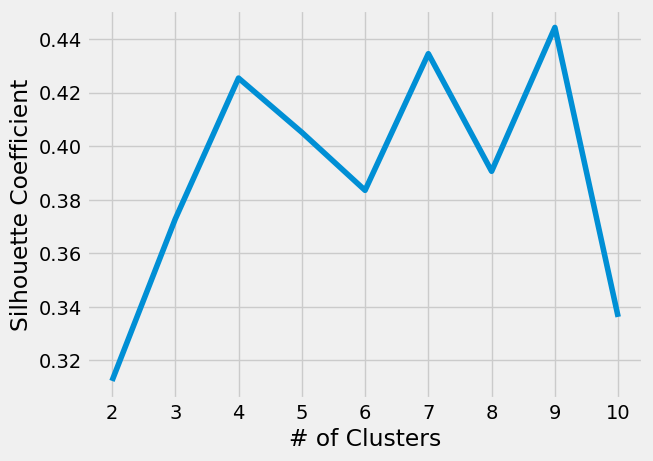

In [367]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil_coef)
plt.xticks(range(2,11))
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Looks like the ultimum number of clusters to use is 3 or 4.

In [368]:
kmeans = KMeans(init = "random", n_clusters=4, n_init=10, max_iter=100)
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=4, n_init=10)

In [369]:
kmeans.inertia_

10.38261303738443

In [370]:
kmeans.cluster_centers_

array([[-0.48498301,  1.13110593],
       [ 0.56753331,  0.28164307],
       [-1.03531834, -0.92645538],
       [ 1.40851448, -1.08262769]])

In [371]:
kmeans.n_iter_

5

In [372]:
kmeans.labels_

array([2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 3,
       3, 3], dtype=int32)

In [373]:
table3.loc[:,('Labels')] = kmeans.labels_.tolist()
table3

/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/2312062434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table3.loc[:,('Labels')] = kmeans.labels_.tolist()


,Jurisdiction,Value,Year,Cost of Living Index,% COLI to AV,Labels
241,Allegany,98.2,2020,84.9,-13.3,2
242,Anne Arundel,34.2,2020,119.6,85.4,0
243,Baltimore City,91.9,2020,101.3,9.4,2
244,Baltimore County,69.9,2020,109.9,40.0,2
245,Calvert,63.0,2020,121.7,58.7,0
246,Caroline,82.0,2020,98.8,16.8,2
247,Carroll,41.3,2020,113.8,72.5,0
248,Cecil,84.7,2020,105.6,20.9,2
249,Charles,41.7,2020,123.5,81.8,0
250,Dorchester,70.6,2020,94.3,23.7,2


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_10674/898280240.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped :


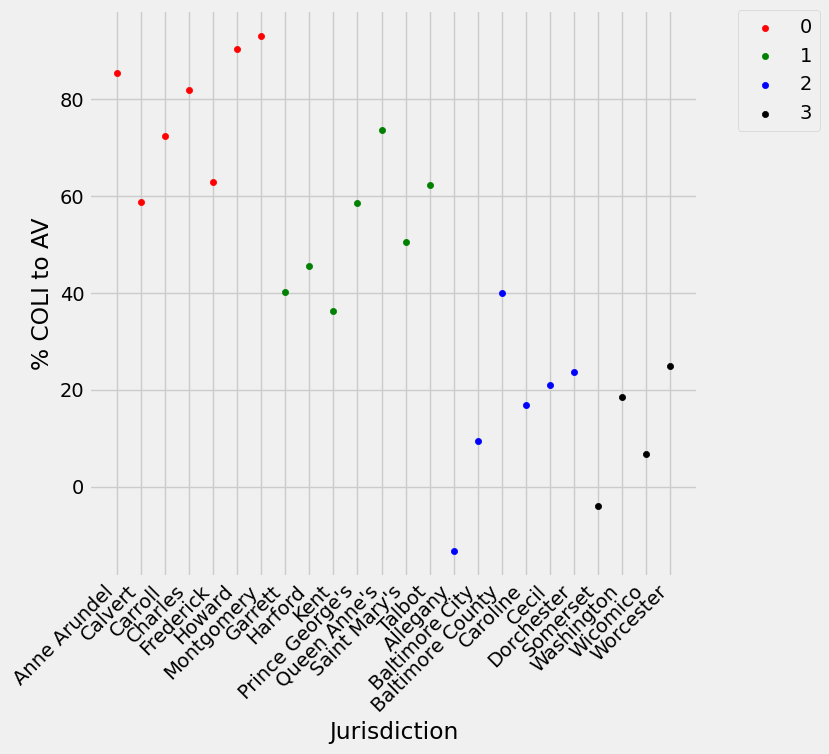

In [374]:
colors = {0 : 'red', 1:'green',2:'blue', 3 : 'black'}
grouped = table3.groupby(['Labels'])
fig, ax = plt.subplots(figsize=(7, 7))
# now, we want to iterate through the df by county
for key, group in grouped :
       # key = group name (aka county name); group = subset of df where jurisdiction == key 
       # first, plotting values for the current county 
       group.plot(ax = ax, kind='scatter', x='Jurisdiction', y='% COLI to AV', label=key,
                     color= colors[key]) 
       
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.2, 1) ,loc = "upper right", borderaxespad = 0)
plt.show()

Group 1 counties are the one's where I would say the gap between COLI and AV is the most reasonable and are probably the most affordable yet good quality places to live.